In [6]:
import pandas as pd
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [8]:
import keras

In [9]:
import tensorflow as tf

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 2000)

In [3]:
kaggleInsultTrain = pd.read_csv('kaggleInsult/train.csv')
kaggleInsultTest = pd.read_csv('kaggleInsult/test_with_solutions.csv')

In [4]:
kaggleInsultTrain.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It seems that you are mixing apples and oranges."""
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has been wrong before now and will be again.\\n\\nUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\xc2\\xa0the cheques in the mail. """
3,0,NaN,"""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people."""
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3."""


In [5]:
kaggleInsultTest.head()

,Insult,Date,Comment,Usage
0,0,NaN,"""THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...",PublicTest
1,0,20120618222256Z,"""@ian21\xa0""Roger Clemens is the fucking man, ...",PublicTest
2,1,20120618213617Z,"""Agree with Alan you are an extremest idiot. ...",PublicTest
3,0,NaN,"""Really?\\n\\nI see Marc Lamont Hill on variou...",PrivateTest
4,0,20120620003825Z,"""Really suck isn't the word, when many of our ...",PrivateTest


In [14]:
pd.concat?

In [5]:
builtDataset = pd.concat([kaggleInsultTrain[['Insult', 'Comment']], kaggleInsultTest[['Insult', 'Comment']]], axis = 0)

In [6]:
kaggleInsultTrain.shape, kaggleInsultTest.shape, builtDataset.shape

((3947, 3), (2647, 4), (6594, 2))

In [7]:
builtDataset.head()

,Insult,Comment
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It seems that you are mixing apples and oranges."""
2,0,"""A\\xc2\\xa0majority of Canadians can and has been wrong before now and will be again.\\n\\nUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\xc2\\xa0the cheques in the mail. """
3,0,"""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people."""
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3."""


In [9]:
kaggleInsultTest.head()

,Insult,Date,Comment,Usage
0,0,NaN,"""THE DRUDGE REPORT\\n\\n\\n\\nYou won't see this story on foxfag forum because they suck bIacks and gay 0bama all the way to the crack.\\n\\n\\n\\n\\n\\n\\n\\nOn Tuesday Rep. Darrell Issa, chairman of the House committee on \\nOversight and Government Reform, took a major step toward holding \\nAttorney General Eric Holder in contempt of Congress for his failure to \\nprovide subpoenaed documents and other information about Operation Fast \\nand Furious.\\n\\n\\n\\nIn a Jan. 31 letter, Issa had threatened Holder with such a move if he \\nfailed to provide all the subpoenaed documents relating to the Fast and \\nFurious gunwalking scandal by Feb. 9. That deadline has come and gone, \\nand Holder\\xe2\\x80\\x99s Department of Justice still hasn\\xe2\\x80\\x99t provided most of those \\ndocuments. Issa\\xe2\\x80\\x99s subpoena dates back to Oct. 12, 2011.\\n\\n\\n\\nOn Tuesday in a seven-page letter, Issa revealed that Deputy Attorney \\nGeneral James Cole begged Congress to extend the Feb. 9 deadline. Issa \\nwrote that the request was \\xe2\\x80\\x9cironic\\xe2\\x80\\x9d and \\xe2\\x80\\x9cignores the reality that the \\nDepartment has unreasonably delayed producing these documents to the \\nCommittee.\\xe2\\x80\\x9d\\n\\n\\n\\n\\xe2\\x80\\x9cOn its face, the requested extension demonstrates a lack of good \\nfaith,\\xe2\\x80\\x9d Issa wrote to Holder. \\xe2\\x80\\x9cWith one exception, the Department has \\nonly produced documents responsive to the subpoena on the eve of \\ncongressional hearings in which senior Department officials testified. \\nThe Department appears to be more concerned with protecting its image \\nthrough spin control than actually cooperating with Congress.\\xe2\\x80\\x9d\\n\\n\\n\\n\\xe2\\x80\\x9cWe cannot wait any longer for the Department\\xe2\\x80\\x99s cooperation,\\xe2\\x80\\x9d Issa \\ncontinued. \\xe2\\x80\\x9cAs such, please specify a date by which you expect the \\nDepartment to produce all documents responsive to the subpoena. In...",PublicTest
1,0,20120618222256Z,"""@ian21\xa0""Roger Clemens is the fucking man, and never did any fucking steroids because he is fucking awesome. Did you all misremember Roger's incredibleness?"" - Roger Clemens""",PublicTest
2,1,20120618213617Z,"""Agree with Alan you are an extremest idiot. You are not American, we native americans are, you are an alien""",PublicTest
3,0,NaN,"""Really?\\n\\nI see Marc Lamont Hill on various programs quite often, as is Al Sharpton, and Michael Moore even got his fat-ass handed to him by Bill O'Reilly. \\n\\nHow can you talk about a subject you obviously know nothing about?""",PrivateTest
4,0,20120620003825Z,"""Really suck isn't the word, when many of our nuclear power plants start melting down, it will literally be hell on earth in the US and we have no one else to blame but our own CORRUPT GOVERNMENT!""",PrivateTest


In [10]:
del(kaggleInsultTest, kaggleInsultTrain)

### kaggleToxic

In [11]:
kaggleToxicTrain = pd.read_csv('kaggleToxic/train.csv')
kaggleToxicTest = pd.read_csv('kaggleToxic/test.csv')
kaggleToxicTestLabels = pd.read_csv('kaggleToxic/test_labels.csv')

In [12]:
kaggleToxicTest.head()

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [13]:
kaggleToxicTestLabels.tail()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1
153163,ffffce3fb183ee80,-1,-1,-1,-1,-1,-1


In [14]:
kaggleToxicTest.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing but too-long-crap"
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n Does it get there faster by throwing to cut off man or direct from out fielder? \n Were the out fielders in the Mickey mantle era have better arms? \n Rich
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is """"more correct."""" I had gotten confused, but then found this: \n :... while acknowledging Japan's territorial rights to Okinotorishima itself ... \n However, is there a category for \n :... did not acknowledge Japan's claim to an exclusive economic zone (EEZ) stemming from Okinotorishima. \n That is, is there a category for """"disputed EEZ""""s? """
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the EU - Germany - has a Law of Return quite similar to Israel's"""" == \n\n This isn't actually true, is it? Germany allows people whose ancestors were citizens of Germany to return, but AFAIK it does not allow the descendants of Anglo-Saxons to """"return"""" to Angeln and Saxony. Israel, by contrast, allows all Jews to """"return"""" to Israel, even if they can't trace a particular ancestral line to anyone who lived in the modern state or even mandate Palestine. — """
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not welcome here. I'm no fool, and if you think that kind of explination is enough, well pity you. """


In [15]:
kaggleToxicTestMerged = pd.concat([kaggleToxicTest, kaggleToxicTestLabels], axis = 1)

In [16]:
kaggleToxicTestMerged.columns = ['id1', 'comment_text', 'id2', 'toxic', 'severe_toxic', 'obscene',
       'threat', 'insult', 'identity_hate']

In [17]:
for col in ['toxic', 'severe_toxic', 'obscene','threat', 'insult', 'identity_hate']:
    kaggleToxicTestMerged[col] = kaggleToxicTestMerged[col].apply(lambda x: 0 if x == -1 else x)

In [18]:
kaggleToxicTestMerged[kaggleToxicTestMerged['toxic'] == 1].head()

,id1,comment_text,id2,toxic,severe_toxic,obscene,threat,insult,identity_hate
21,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but no protests in Europe. == \n\n May Europe also burn in hell.",00091c35fa9d0465,1,0,0,0,0,0
48,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick so much!!!!!,0013fed3aeae76b7,1,0,1,0,1,1
59,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",0017d4d47894af05,1,0,1,0,1,0
76,001d739c97bc2ae4,"How dare you vandalize that page about the HMS Beagle! Don't vandalize again, demon!",001d739c97bc2ae4,1,0,0,0,0,0
81,001eff4007dbb65b,"::No, he is an arrogant, self serving, immature idiot. Get it right.",001eff4007dbb65b,1,0,1,0,1,0


In [19]:
kaggleToxicTestMerged['Insult'] = kaggleToxicTestMerged.iloc[:, 3:].sum(axis = 1).apply(lambda x: 1 if x > 0 else 0)

In [20]:
kaggleToxicTestMerged['Insult'].value_counts()

0    146921
1      6243
Name: Insult, dtype: int64

In [21]:
kaggleToxicTrain['Insult'] = kaggleToxicTrain.iloc[:, 2:].sum(axis = 1).apply(lambda x: 1 if x > 0 else 0)

In [22]:
kaggleToxicTrain['Insult'].value_counts()

0    143346
1     16225
Name: Insult, dtype: int64

In [23]:
kaggleToxicTestMerged.columns = ['id1', 'Comment', 'id2', 'toxic', 'severe_toxic', 'obscene',
       'threat', 'insult', 'identity_hate', 'Insult']

In [24]:
kaggleToxicTrain.columns = ['id', 'Comment', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'Insult']

In [25]:
builtDataset = pd.concat([builtDataset, kaggleToxicTestMerged[['Insult', 'Comment']], 
                          kaggleToxicTrain[['Insult', 'Comment']]], axis = 0)

In [26]:
builtDataset.head()

,Insult,Comment
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It seems that you are mixing apples and oranges."""
2,0,"""A\\xc2\\xa0majority of Canadians can and has been wrong before now and will be again.\\n\\nUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\xc2\\xa0the cheques in the mail. """
3,0,"""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people."""
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3."""


In [27]:
builtDataset.shape

(319329, 2)

In [28]:
kaggleToxicTest.shape, kaggleToxicTrain.shape, kaggleToxicTestLabels.shape, kaggleToxicTestMerged.shape

((153164, 2), (159571, 9), (153164, 7), (153164, 10))

In [29]:
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']:
    print(kaggleToxicTrain.iloc[:,2:][col].value_counts())

0    144277
1     15294
Name: toxic, dtype: int64
0    157976
1      1595
Name: severe_toxic, dtype: int64
0    151122
1      8449
Name: obscene, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: insult, dtype: int64
0    158166
1      1405
Name: identity_hate, dtype: int64


In [30]:
del(kaggleToxicTest, kaggleToxicTestLabels, kaggleToxicTestMerged, kaggleToxicTrain)

### Wikipedia TalkLabel  Personal Attacks

In [31]:
attack_annotated_comments = pd.read_csv('wikipediaTalkLabelsPersonalAttacks/4054689/attack_annotated_comments.tsv', delimiter='\t')

In [32]:
attack_annotated_comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,"`-NEWLINE_TOKENThis is not ``creative``. Those are the dictionary definitions of the terms ``insurance`` and ``ensurance`` as properly applied to ``destruction``. If you don't understand that, fine, legitimate criticism, I'll write up ``three man cell`` and ``bounty hunter`` and then it will be easy to understand why ``ensured`` and ``insured`` are different - and why both differ from ``assured``.NEWLINE_TOKENNEWLINE_TOKENThe sentence you quote is absolutely neutral. You just aren't familiar with the underlying theory of strike-back (e.g. submarines as employed in nuclear warfare) guiding the insurance, nor likely the three man cell structure that kept the IRA from being broken by the British. If that's my fault, fine, I can fix that to explain. But ther'es nothing ``personal`` or ``creative`` about it.NEWLINE_TOKENNEWLINE_TOKENI'm tired of arguing with you. Re: the other article, ``multi-party`` turns up plenty, and there is more use of ``mutually`` than ``mutual``. If I were to apply your standard I'd be moving ``Mutual Assured Destruction`` to ``talk`` for not appealing to a Reagan voter's biases about its effectiveness, and for dropping the ``ly``.NEWLINE_TOKENNEWLINE_TOKENThere is a double standard in your edits. If it comes from some US history book, like ``peace movement`` or 'M.A.D.' as defined in 1950, you like it, even if the definition is totally useless in 2002 and only of historical interest. NEWLINE_TOKENNEWLINE_TOKENIf it makes any even-obvious connection or implication from the language chosen in multiple profession-specific terms, you consider it somehow non-neutral... Gandhi thinks ``eye for an eye`` describes riots, death penalty, and war all at once, but you don't. What do you know that Gandhi doesn't?NEWLINE_TOKENNEWLINE_TOKENGuess what: reality is not neutral. Current use of terms is slightly more controversial. Neutrality requires negotiation, and some willingness to learn.NEWLINE_TOKENNEWLINE_TOKENThis is your problem not mi...",2002,False,article,random,train
1,44816,"`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``standard model`` is itself less NPOV than I think we'd prefer...NEWLINE_TOKENNEWLINE_TOKEN:: if it's ``new-age speak`` then a lot of old-age people speak it - Karl Popper, the Pope, etc. here's Karl Popper's view of this.NEWLINE_TOKENNEWLINE_TOKEN:: The clearest title for this article would be ``particle physics cosmology`` - but as I say that would require broader treatment of issues like the Anthropic Principle, cognitive bias beyond the particle physics zoo, etc.NEWLINE_TOKENNEWLINE_TOKEN:: as to accelerators, it's clear that while they are in use, someone is still looking for particles. So this is not yet a settled ``cosmology`` so certain that we abandon the search... nor is it an arbitrary foundation ontology as you suggest, not subject to question.`",2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the situation as of March 2002 was such: NEWLINE_TOKENA Saudi proposal of Land for Peace AND recognition by ALL arab countries was made. The day the proposal was to be made formal by the Arab League was the day the Israeli's under the command of Ariel Sharon began the invasion of the Palestinian self-rule areas. user:Arab.",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less condescending with your suggestions about reading the naming conventions and FDL, both of which I read quite a while ago, thanks. I really liked the bit where you were explaining why you had no interest in fixing things I complained about because you felt insulted, yet you were being extremely insulting at the time. With any luck, you can learn to be less of a jerk. GregLindahlNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKEN",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


In [33]:
attack_annotations = pd.read_csv('wikipediaTalkLabelsPersonalAttacks/4054689/attack_annotations.tsv', delimiter='\t')

In [34]:
attack_annotations.columns

Index(['rev_id', 'worker_id', 'quoting_attack', 'recipient_attack',
       'third_party_attack', 'other_attack', 'attack'],
      dtype='object')

In [35]:
for col in ['quoting_attack', 'recipient_attack', 'third_party_attack', 'other_attack', 'attack']:
    print(attack_annotations[col].value_counts())

0.0    1354944
1.0      10273
Name: quoting_attack, dtype: int64
0.0    1212610
1.0     152607
Name: recipient_attack, dtype: int64
0.0    1320646
1.0      44571
Name: third_party_attack, dtype: int64
0.0    1321096
1.0      44121
Name: other_attack, dtype: int64
0.0    1137281
1.0     227936
Name: attack, dtype: int64


In [36]:
attack_annotations[((attack_annotations['recipient_attack'] == 1) & (attack_annotations['attack'] == 0))].head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack


In [37]:
attack_annotations.shape, attack_annotated_comments.shape

((1365217, 7), (115864, 7))

In [38]:
len(np.unique(attack_annotations['rev_id'])), len(np.unique(attack_annotated_comments['rev_id'])), 

(115864, 115864)

In [39]:
attack_annotationsGrouped = attack_annotations.groupby(['rev_id']).agg({'attack': 'mean'}).reset_index()

In [40]:
attack_annotationsGrouped.head()

,rev_id,attack
0,37675,0.000000
1,44816,0.000000
2,49851,0.000000
3,89320,0.444444
4,93890,0.000000


In [41]:
attack_annotationsGrouped['Insult'] = attack_annotationsGrouped['attack'].apply(lambda x: 1 if x > 0.3 else 0)

In [42]:
personalAttackData = pd.merge(attack_annotationsGrouped, attack_annotated_comments, on='rev_id')

In [43]:
personalAttackData.columns = ['rev_id', 'attack', 'Insult', 'Comment', 'year', 'logged_in', 'ns', 'sample', 'split']

In [44]:
builtDataset = pd.concat([builtDataset, personalAttackData[['Insult', 'Comment']]], axis = 0)

In [45]:
builtDataset.head()

,Insult,Comment
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It seems that you are mixing apples and oranges."""
2,0,"""A\\xc2\\xa0majority of Canadians can and has been wrong before now and will be again.\\n\\nUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\xc2\\xa0the cheques in the mail. """
3,0,"""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people."""
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3."""


In [46]:
builtDataset.shape

(435193, 2)

In [47]:
attack_annotations.groupby(['rev_id']).agg({'attack': 'mean'}).reset_index()['attack'].apply(lambda x: 1 if x > 0.3
                                                                                             else 0).value_counts()

0    94062
1    21802
Name: attack, dtype: int64

In [166]:
builtDataset.to_csv('builtDataset1.csv', index=False)

In [49]:
del(personalAttackData)

### Kaggle JigSaw

In [167]:
kaggleJigsawTrain = pd.read_csv('kagglejigsaw/jigsaw-unintended-bias-in-toxicity-classification/train.csv')

In [188]:
kaggleJigsawTrain.head()

,id,target,Comment,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,Insult
0,59848,0.000000,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,0
1,59849,0.000000,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,0
2,59852,0.000000,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,0
3,59855,0.000000,Is this something I'll be able to install on my site? When will you be releasing it?,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,0
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47,1


In [172]:
kaggleJigsawTrain['Insult'] = kaggleJigsawTrain['target'].apply(lambda x: 1 if x > 0.5 else 0)

In [175]:
kaggleJigsawTrain.columns = ['id', 'target', 'Comment', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability', 'jewish', 'latino', 'male', 'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity', 'other_religion', 'other_sexual_orientation', 'physical_disability', 'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date', 'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit', 'identity_annotator_count', 'toxicity_annotator_count', 'Insult']

In [179]:
kaggleJigsawTrain.shape

(1804874, 46)

In [186]:
kaggleJigsawTrain.head()

,id,target,Comment,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,Insult
0,59848,0.000000,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,0
1,59849,0.000000,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,0
2,59852,0.000000,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,0
3,59855,0.000000,Is this something I'll be able to install on my site? When will you be releasing it?,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,0
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47,1


In [176]:
builtDataset = pd.concat([builtDataset, kaggleJigsawTrain[['Insult', 'Comment']]], axis = 0)

In [177]:
builtDataset.shape

(2240067, 2)

In [181]:
kaggleJigsawTestPublic = pd.read_csv('kagglejigsaw/jigsaw-unintended-bias-in-toxicity-classification/test_public_expanded.csv')

In [196]:
kaggleJigsawTestPublic.shape

(97320, 46)

In [191]:
kaggleJigsawTestPublic['Insult'] = kaggleJigsawTestPublic.toxicity.apply(lambda x: 1 if x > 0.5 else 0)

In [193]:
kaggleJigsawTestPublic.columns = ['id', 'Comment', 'created_date', 'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult', 'threat', 'identity_annotator_count', 'toxicity_annotator_count', 'male', 'female', 'transgender', 'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian', 'latino', 'other_race_or_ethnicity', 'physical_disability', 'intellectual_or_learning_disability', 'psychiatric_or_mental_illness', 'other_disability', 'Insult']

In [194]:
builtDataset = pd.concat([builtDataset, kaggleJigsawTestPublic[['Insult', 'Comment']]], axis = 0)

In [195]:
builtDataset.shape

(2337387, 2)

In [197]:
kaggleJigsawTestPrivate = pd.read_csv('kagglejigsaw/jigsaw-unintended-bias-in-toxicity-classification/test_private_expanded.csv')

In [200]:
kaggleJigsawTestPrivate['Insult'] = kaggleJigsawTestPrivate.toxicity.apply(lambda x: 1 if x > 0.5 else 0)

In [202]:
kaggleJigsawTestPrivate.columns = ['id', 'Comment', 'created_date', 'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult', 'threat', 'identity_annotator_count', 'toxicity_annotator_count', 'male', 'female', 'transgender', 'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian', 'latino', 'other_race_or_ethnicity', 'physical_disability', 'intellectual_or_learning_disability', 'psychiatric_or_mental_illness', 'other_disability', 'Insult']

In [203]:
kaggleJigsawTestPrivate.head()

,id,Comment,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,Insult
0,7097320,[ Integrity means that you pay your debts.]\n\nDoes this apply to President Trump too?,2017-09-13 20:12:01.484121+00,21,5945023.0,376974,approved,0,0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,7097321,This is malfeasance by the Administrator and the Board. They are wasting our money!,2017-05-17 07:01:51.902566+00,55,NaN,335003,approved,0,0,0,0,0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,7097322,"@Rmiller101 - Spoken like a true elitist. But look out bud. The re-awakening in Europe, Brexit and now the Trump victory are just the beginning. The unwashed masses are coming for you and your ilk….",2016-12-02 17:12:12.920957+00,54,649389.0,154126,approved,0,0,0,1,0,0.3,0.0,0.0,0.0,0.0,0.2,0.0,4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7097323,"Paul: Thank you for your kind words. I do, indeed, have strong beliefs and don't hide them. They are based on both facts and values. I think the question of ""bias"" and ""prejudice"" comes into play when we're discussing beliefs and attitudes based on values. One of our poster friends, for example, often comments that being ""intolerant"" of a bias, for example, is, in itself, a bias. This is, IMO, where the concept of ""irratonal antipathy"" is important. If I dislike neo-Nazis because of their views on race, my antipathy is based on fact (knowledge of their views) and values (my belief that condemning others because of their race/religion is WRONG). Were I to, instead, dislike all Germans, that, IMO, would represent a bias...an irrational antipathy...since not all Germans condemn others because of their race/religion. I discuss the ""bias"" question in another response to you....\n\nIt's an interesting topic and I'd enjoy discussing it w/you sometime. Give me a call. Gary Crum",2017-04-21 14:58:05.474657+00,13,5158666.0,328376,approved,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,7097324,Sorry you missed high school. Eisenhower sent troops to Vietnam after the French withdrew in 1954 and before that America was providing 50% of the cost of that war. WWI & WWII were won by Democrat Presidents and the last win a Republican had was 1865 but the did surrender in Korea and Vietnam and fail to win in desert Storm or these two wars.,2017-10-01 19:43:12.373229+00,102,6061626.0,383983,approved,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [204]:
kaggleJigsawTestPrivate.shape

(97320, 46)

In [205]:
builtDataset = pd.concat([builtDataset, kaggleJigsawTestPrivate[['Insult', 'Comment']]], axis = 0)

In [206]:
builtDataset.shape

(2434707, 2)

In [207]:
builtDataset.to_csv('builtDataset2.csv', index=False)

### Processing of comments

In [223]:
builtDataset.head(60)

,Insult,Comment
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It seems that you are mixing apples and oranges."""
2,0,"""A\\xc2\\xa0majority of Canadians can and has been wrong before now and will be again.\\n\\nUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\xc2\\xa0the cheques in the mail. """
3,0,"""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people."""
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3."""
5,0,"""@SDL OK, but I would hope they'd sign him to a one-year contract to start with. Give him the chance to be reliable and productive, but give themselves the out if all his time off has hurt his playing skills or if he falls back into old habits."""
6,0,"""Yeah and where are you now?"""
7,1,"""shut the fuck up. you and the rest of your faggot friends should be burned at the stake"""
8,1,"""Either you are fake or extremely stupid...maybe both..."""
9,1,"""That you are an idiot who understands neither taxation nor women's health."""


In [219]:
builtDataset.reset_index(inplace=True, drop=True)

In [220]:
sample1 = builtDataset.loc[4,'Comment']

In [221]:
sample1

'"C\\xe1c b\\u1ea1n xu\\u1ed1ng \\u0111\\u01b0\\u1eddng bi\\u1ec3u t\\xecnh 2011 c\\xf3 \\xf4n ho\\xe0 kh\\xf4ng ? \\nC\\xe1c ng\\u01b0 d\\xe2n ng\\u1ed3i cu\\xed \\u0111\\u1ea7u chi\\u1ee5 nh\\u1ee5c c\\xf3 \\xf4n ho\\xe0 kh\\xf4ng ?\\nC\\xe1c n\\xf4ng d\\xe2n gi\\u1eef \\u0111\\u1ea5t \\u1edf V\\u0103n Giang, C\\u1ea7n Th\\u01a1 c\\xf3 \\xf4n ho\\xe0 kh\\xf4ng ?\\n.................\\nR\\u1ed1t cu\\u1ed9c \\u0111\\u01b0\\u1ee3c g\\xec\\xa0 th\\xec ch\\xfang ta \\u0111\\xe3 bi\\u1ebft !\\nAi c\\u0169ng y\\xeau chu\\u1ed9ng ho\\xe0 b\\xecnh, nh\\u01b0ng \\u0111\\xf4i khi ho\\xe0 b\\xecnh ch\\u1ec9 th\\u1eadt s\\u1ef1 \\u0111\\u1ebfn sau chi\\u1ebfn tranh m\\xe0 th\\xf4i.\\nKh\\xf4ng c\\xf2n con \\u0111\\u01b0\\u1eddng n\\xe0o ch\\u1ecdn kh\\xe1c \\u0111\\xe2u, \\u0111\\u1eebng m\\u01a1 th\\xeam n\\u01b0\\xe3."'

In [239]:
import re
def excessRemover(x):
    x = x.replace("\\n", " ")
    x = x.replace("\\t", " ")
    x = x.replace("\\xa0", " ")
    x = x.replace("\\xc2", " ")
    
    x = x.replace("\\", " ")
    x = x.replace("\t", " ")
    x = x.replace("\n", " ")
    x = x.replace("  ", " ")
    
    x = x.replace(" u "," you ")
    x = x.replace(" em "," them ")
    x = x.replace(" da "," the ")
    x = x.replace(" yo "," you ")
    x = x.replace(" ur "," you ")
    
    x = x.replace("won't", "will not")
    x = x.replace("can't", "cannot")
    x = x.replace("i'm", "i am")
    x = x.replace(" im ", " i am ")
    x = x.replace("ain't", "is not")
    x = x.replace("don't", "do not")
    x = x.replace("'ll", " will")
    x = x.replace("n't", " not")
    x = x.replace("'ve", " have")
    x = x.replace("'s", " is")
    x = x.replace("'re", " are")
    x = x.replace("'d", " would")
    x = x.replace("NEWLINE_TOKEN", " ")
    x = re.sub("[0-9]*", "", x)
    
    return x

In [242]:
builtDatasetFiltered = builtDataset['Comment'].apply(lambda x: excessRemover(x))

In [ ]:
dataSubsetdataSubsetdataSubsetf = [x.lower() for x in f]
    f = [x.replace("\\n"," ") for x in f]        
    f = [x.replace("\\t"," ") for x in f]        
    f = [x.replace("\\xa0"," ") for x in f]
    f = [x.replace("\\xc2"," ") for x in f]

    #f = [x.replace(","," ").replace("."," ").replace(" ", "  ") for x in f]
    #f = [re.subn(" ([a-z]) ","\\1", x)[0] for x in f]  
    #f = [x.replace("  "," ") for x in f]

    f = [x.replace(" u "," you ") for x in f]
    f = [x.replace(" em "," them ") for x in f]
    f = [x.replace(" da "," the ") for x in f]
    f = [x.replace(" yo "," you ") for x in f]
    f = [x.replace(" ur "," you ") for x in f]
    #f = [x.replace(" ur "," your ") for x in f]
    #f = [x.replace(" ur "," you're ") for x in f]
    
    f = [x.replace("won't", "will not") for x in f]
    f = [x.replace("can't", "cannot") for x in f]
    f = [x.replace("i'm", "i am") for x in f]
    f = [x.replace(" im ", " i am ") for x in f]
    f = [x.replace("ain't", "is not") for x in f]
    f = [x.replace("'ll", " will") for x in f]
    f = [x.replace("'t", " not") for x in f]
    f = [x.replace("'ve", " have") for x in f]
    f = [x.replace("'s", " is") for x in f]
    f = [x.replace("'re", " are") for x in f]
    f = [x.replace("'d", " would") for x in f]

In [232]:
sample1.replace("\\n"," ").replace("\\t"," ").replace("\\xa0"," ").replace("\\xc2"," ").replace("\\", "")

'"Cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1ec3u txecnh 2011 cxf3 xf4n hoxe0 khxf4ng ?  Cxe1c ngu01b0 dxe2n ngu1ed3i cuxed u0111u1ea7u chiu1ee5 nhu1ee5c cxf3 xf4n hoxe0 khxf4ng ? Cxe1c nxf4ng dxe2n giu1eef u0111u1ea5t u1edf Vu0103n Giang, Cu1ea7n Thu01a1 cxf3 xf4n hoxe0 khxf4ng ? ................. Ru1ed1t cuu1ed9c u0111u01b0u1ee3c gxec  thxec chxfang ta u0111xe3 biu1ebft ! Ai cu0169ng yxeau chuu1ed9ng hoxe0 bxecnh, nhu01b0ng u0111xf4i khi hoxe0 bxecnh chu1ec9 thu1eadt su1ef1 u0111u1ebfn sau chiu1ebfn tranh mxe0 thxf4i. Khxf4ng cxf2n con u0111u01b0u1eddng nxe0o chu1ecdn khxe1c u0111xe2u, u0111u1eebng mu01a1 thxeam nu01b0xe3."'

In [247]:
builtDataset.head(20)

,Insult,Comment,FilteredComment
0,1,"""You fuck your dad.""","""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It seems that you are mixing apples and oranges.""","""i really do not understand your point. It seems that you are mixing apples and oranges."""
2,0,"""A\\xc2\\xa0majority of Canadians can and has been wrong before now and will be again.\\n\\nUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\xc2\\xa0the cheques in the mail. ""","""A majority of Canadians can and has been wrong before now and will be again. Unless you are supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them is the breaks and we can always regard you as collateral damage like in wartime - and sorry, but the cheques in the mail. """
3,0,"""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people.""","""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people."""
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3.""","""C xec b uean xu uedng u ub ueddng bi uecu t xecnh c xf xfn ho xe kh xfng ? C xec ng ub d xen ng uedi cu xed u ueau chi uee nh ueec c xf xfn ho xe kh xfng ? C xec n xfng d xen gi ueef u ueat uedf V un Giang, C uean Th ua c xf xfn ho xe kh xfng ? ................. R uedt cu uedc u ub ueec g xec th xec ch xfang ta u xe bi uebft ! Ai c ung y xeau chu uedng ho xe b xecnh, nh ubng u xfi khi ho xe b xecnh ch uec th ueadt s uef u uebfn sau chi uebfn tranh m xe th xfi. Kh xfng c xfn con u ub ueddng n xeo ch uecdn kh xec u xeu, u ueebng m ua th xeam n ub xe."""
5,0,"""@SDL OK, but I would hope they'd sign him to a one-year contract to start with. Give him the chance to be reliable and productive, but give themselves the out if all his time off has hurt his playing skills or if he falls back into old habits.""","""@SDL OK, but I would hope they would sign him to a one-year contract to start with. Give him the chance to be reliable and productive, but give themselves the out if all his time off has hurt his playing skills or if he falls back into old habits."""
6,0,"""Yeah and where are you now?""","""Yeah and where are you now?"""
7,1,"""shut the fuck up. you and the rest of your faggot friends should be burned at the stake""","""shut the fuck up. you and the rest of your faggot friends should be burned at the stake"""
8,1,"""Either you are fake or extremely stupid...maybe both...""","""Either you are fake or extremely stupid...maybe both..."""
9,1,"""That you are an idiot who understands neither taxation nor women's health.""","""That you are an idiot who understands neither taxation nor women is health."""


In [248]:
builtDataset.to_csv('builtDataset3.csv',  index=False)

In [245]:
builtDataset['FilteredComment'] = builtDatasetFiltered

In [244]:
builtDatasetFiltered.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             "You fuck your dad."
1                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [253]:
builtDataset.Insult.value_counts(normalize=True)

0    0.932687
1    0.067313
Name: Insult, dtype: float64

In [256]:
import nltk
from nltk.corpus import stopwords

# engStopwords = stopwords.words('english')

In [258]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/xavient/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [259]:
engStopwords = stopwords.words('english')

In [261]:
print(engStopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
engStopwordsFiltered = ['this', 'am', 'is', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
                        'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about','between', 
                        'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 
                        'down', 'in', 'out', 'on', 'off', 'over', 'under','further', 'then', 'once', 'here', 
                        'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
                        'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 
                        't',
                       ]

### Processing on a subset of the data

In [6]:
builtDataset= pd.read_csv('builtDataset3.csv')

In [7]:
builtDataset.shape

(2434707, 3)

In [8]:
dataSubset = builtDataset.iloc[:10000, :]

In [54]:
dataSubset.head()

,Insult,Comment,FilteredComment
0,1,"""You fuck your dad.""","""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It seems that you are mixing apples and oranges.""","""i really do not understand your point. It seems that you are mixing apples and oranges."""
2,0,"""A\\xc2\\xa0majority of Canadians can and has been wrong before now and will be again.\\n\\nUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\xc2\\xa0the cheques in the mail. ""","""A majority of Canadians can and has been wrong before now and will be again. Unless you are supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them is the breaks and we can always regard you as collateral damage like in wartime - and sorry, but the cheques in the mail. """
3,0,"""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people.""","""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people."""
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3.""","""C xec b uean xu uedng u ub ueddng bi uecu t xecnh c xf xfn ho xe kh xfng ? C xec ng ub d xen ng uedi cu xed u ueau chi uee nh ueec c xf xfn ho xe kh xfng ? C xec n xfng d xen gi ueef u ueat uedf V un Giang, C uean Th ua c xf xfn ho xe kh xfng ? ................. R uedt cu uedc u ub ueec g xec th xec ch xfang ta u xe bi uebft ! Ai c ung y xeau chu uedng ho xe b xecnh, nh ubng u xfi khi ho xe b xecnh ch uec th ueadt s uef u uebfn sau chi uebfn tranh m xe th xfi. Kh xfng c xfn con u ub ueddng n xeo ch uecdn kh xec u xeu, u ueebng m ua th xeam n ub xe."""


In [55]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [94]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(dataSubset.FilteredComment))
list_tokenized_train = tokenizer.texts_to_sequences(dataSubset.FilteredComment)

In [57]:
list_tokenized_train

[[2, 64, 14, 1120],
 [7, 94, 18, 11, 170, 14, 177, 12, 605, 10, 2, 9, 2496, 1533, 5, 1121],
 [4,
  859,
  8,
  2497,
  46,
  5,
  56,
  95,
  303,
  140,
  60,
  5,
  32,
  19,
  128,
  419,
  2,
  9,
  2498,
  8,
  1,
  375,
  10,
  118,
  6,
  320,
  606,
  39,
  1534,
  30,
  2,
  160,
  14,
  2499,
  5,
  26,
  36,
  68,
  2500,
  288,
  14,
  470,
  39,
  471,
  69,
  73,
  6,
  1,
  1122,
  5,
  36,
  46,
  270,
  1535,
  2,
  35,
  2501,
  1536,
  20,
  13,
  2502,
  5,
  253,
  27,
  1,
  2503,
  13,
  1,
  1537],
 [728,
  26,
  2,
  161,
  1123,
  44,
  860,
  3,
  4,
  113,
  39,
  4,
  254,
  161,
  18,
  12,
  24,
  37,
  12,
  729,
  2,
  26,
  135,
  43,
  124,
  860,
  472,
  13,
  14,
  1538,
  18,
  2,
  153,
  73,
  18,
  73,
  5,
  14,
  198,
  6,
  30,
  473,
  27,
  2504,
  3,
  2505,
  26,
  14,
  11,
  20,
  67,
  188,
  2,
  1124,
  1539,
  3,
  607,
  43],
 [129,
  420,
  141,
  529,
  2506,
  1540,
  29,
  237,
  1541,
  1125,
  2507,
  238,
  861,
  129,
  27

In [58]:
lengths = dataSubset.FilteredComment.apply(lambda x : len(x.split()))

In [59]:
lengths.value_counts().sort_index()

1       3
2       3
3      14
4      32
5      24
6      36
7      43
8      38
9      49
10     29
11     25
12     31
13     36
14     21
15     28
16     33
17     28
18     33
19     29
20     14
21     20
22     19
23     17
24     13
25     17
26     10
27      9
28     18
29      5
30     12
31     16
32     10
33      9
34      7
35     10
36      5
37      8
38      8
39      9
40      4
41      9
42      8
43      5
44      3
45      3
46      8
47      9
48      4
49      5
50      8
51      8
52      2
53      1
54      4
55      5
56      3
57      2
58      4
59      5
60      2
61      4
62      4
63      4
64      2
65      4
66      1
67      1
69      1
70      1
71      4
72      2
73      1
76      2
77      2
78      2
79      1
80      1
81      3
84      1
85      2
86      1
87      2
88      2
89      2
90      3
91      1
92      2
93      4
94      2
95      2
97      2
98      2
99      2
100     1
101     1
102     2
104     2
105     1
106     1
107     2


In [95]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
# X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [61]:
list_tokenized_train

[[2, 64, 14, 1120],
 [7, 94, 18, 11, 170, 14, 177, 12, 605, 10, 2, 9, 2496, 1533, 5, 1121],
 [4,
  859,
  8,
  2497,
  46,
  5,
  56,
  95,
  303,
  140,
  60,
  5,
  32,
  19,
  128,
  419,
  2,
  9,
  2498,
  8,
  1,
  375,
  10,
  118,
  6,
  320,
  606,
  39,
  1534,
  30,
  2,
  160,
  14,
  2499,
  5,
  26,
  36,
  68,
  2500,
  288,
  14,
  470,
  39,
  471,
  69,
  73,
  6,
  1,
  1122,
  5,
  36,
  46,
  270,
  1535,
  2,
  35,
  2501,
  1536,
  20,
  13,
  2502,
  5,
  253,
  27,
  1,
  2503,
  13,
  1,
  1537],
 [728,
  26,
  2,
  161,
  1123,
  44,
  860,
  3,
  4,
  113,
  39,
  4,
  254,
  161,
  18,
  12,
  24,
  37,
  12,
  729,
  2,
  26,
  135,
  43,
  124,
  860,
  472,
  13,
  14,
  1538,
  18,
  2,
  153,
  73,
  18,
  73,
  5,
  14,
  198,
  6,
  30,
  473,
  27,
  2504,
  3,
  2505,
  26,
  14,
  11,
  20,
  67,
  188,
  2,
  1124,
  1539,
  3,
  607,
  43],
 [129,
  420,
  141,
  529,
  2506,
  1540,
  29,
  237,
  1541,
  1125,
  2507,
  238,
  861,
  129,
  27

In [62]:
X_t.shape

(1000, 200)

In [96]:
y = dataSubset.Insult

In [97]:
inp = Input(shape=(maxlen,))

In [98]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [99]:
x.shape

TensorShape([None, 200, 128])

In [100]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [101]:
x.shape

TensorShape([None, 200, 60])

In [102]:
x = GlobalMaxPool1D()(x)

In [103]:
x.shape

TensorShape([None, 60])

In [104]:
x = Dropout(0.1)(x)

In [105]:
x = Dense(50, activation="relu")(x)

In [106]:
x = Dropout(0.1)(x)

In [107]:
x = Dense(1, activation="sigmoid")(x)

In [108]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [109]:
batch_size = 32
epochs = 30
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

/home/xavient/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9000 samples, validate on 1000 samples
Epoch 1/30
9000/9000 [==============================] - 29s 3ms/step - loss: 0.4578 - accuracy: 0.8087 - val_loss: 0.2003 - val_accuracy: 0.9220
Epoch 2/30
9000/9000 [==============================] - 30s 3ms/step - loss: 0.2663 - accuracy: 0.8914 - val_loss: 0.1927 - val_accuracy: 0.9290
Epoch 3/30
9000/9000 [==============================] - 30s 3ms/step - loss: 0.1608 - accuracy: 0.9398 - val_loss: 0.2402 - val_accuracy: 0.9280
Epoch 4/30
9000/9000 [==============================] - 29s 3ms/step - loss: 0.0922 - accuracy: 0.9681 - val_loss: 0.3312 - val_accuracy: 0.9110
Epoch 5/30
9000/9000 [==============================] - 29s 3ms/step - loss: 0.0558 - accuracy: 0.9814 - val_loss: 0.3786 - val_accuracy: 0.9170
Epoch 6/30
9000/9000 [==============================] - 29s 3ms/step - loss: 0.0366 - accuracy: 0.9876 - val_loss: 0.4447 - val_accuracy: 0.9250
Epoch 7/30
9000/9000 [==============================] - 28s 3ms/step - loss: 0.027

In [111]:
!pip install pydot

In [114]:
from keras.utils.vis_utils import plot_model
# model = Sequential()
# model.add(Dense(2, input_dim=1, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [121]:
import pickle

with open('model_pkl', 'wb') as file:
    pickle.dump(model, file)



In [116]:
import pydot

In [117]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [120]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           45360     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 60)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0   

### Processing on the whole data

In [11]:
pd.read_csv?

In [12]:
builtDataset = pd.read_csv('builtDataset4.csv', nrows = 10000)
# builtDataset3 = pd.concat(builtDataset, ignore_index=True)

In [13]:
builtDataset.shape

(10000, 3)

In [14]:
builtDataset.FilteredComment.fillna("", inplace=True)

In [9]:
builtDataset.head()

,Insult,Comment,FilteredComment
0,1,"""You fuck your dad.""",fuck your dad.
1,0,"""i really don't understand your point.\xa0 It seems that you are mixing apples and oranges.""",i really do not understand your point. It seems that are mixing apples oranges.
2,0,"""A\\xc2\\xa0majority of Canadians can and has been wrong before now and will be again.\\n\\nUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\xc2\\xa0the cheques in the mail. ""","majority Canadians can has been wrong now will be again. Unless are supportive idea that nothing full proof perfect take your chances we should inadvertently kill your son daughter them breaks we can always regard collateral damage like wartime - sorry, cheques mail."
3,0,"""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people.""","listen dont wanna get married man women DONT DO IT. what would it bother gay people got married stay your lane do let them do them. your god nice quick judg your not like him, thought wasnt suppose judge people."
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3.""","C xec b uean xu uedng u ub ueddng bi uecu xecnh c xf xfn ho xe kh xfng ? C xec ng ub d xen ng uedi cu xed u ueau chi uee nh ueec c xf xfn ho xe kh xfng ? C xec n xfng d xen gi ueef u ueat uedf V un Giang, C uean Th ua c xf xfn ho xe kh xfng ? ................. R uedt cu uedc u ub ueec g xec th xec ch xfang ta u xe bi uebft ! Ai c ung y xeau chu uedng ho xe b xecnh, nh ubng u xfi khi ho xe b xecnh ch uec th ueadt s uef u uebfn sau chi uebfn tranh m xe th xfi. Kh xfng c xfn con u ub ueddng n xeo ch uecdn kh xec u xeu, u ueebng m ua th xeam n ub xe."


In [15]:
dataSubset = builtDataset.iloc[:10000,:]

In [16]:
dataSubset.tail()

,Insult,Comment,FilteredComment
9995,1,"== I was involved in a lot of articles surrounding Canwest: how exactly did this senior wiki editor restrict the canwest article. Sock puppet. Double standard. Hypocrites. == \n http://en.wikipedia.org/wiki/User:Bwilkins To haida chieftain, You're a disruptive troll. You're actions are embarrassing, and not at all encyclopedic. I was involved in a lot of articles surrounding Canwest - you know NOTHING. Take your soapbox and start a blog somewhere - www.thesmokinggun.com or some crap like that. Embarrasment. Yours truly, Suck puppet Bwilkins.","I was involved lot articles surrounding Canwest: exactly did senior wiki editor restrict canwest article. Sock puppet. Double standard. Hypocrites. http://en.wikipedia.org/wiki/User:Bwilkins haida chieftain, are disruptive troll. are actions are embarrassing, not encyclopedic. I was involved lot articles surrounding Canwest - know NOTHING. Take your soapbox start blog somewhere - www.thesmokinggun.com crap like that. Embarrasment. Yours truly, Suck puppet Bwilkins."
9996,0,":Better to say what he has allegedly disclosed, because some of it is disputed. ← '''' →",":Better say what he has allegedly disclosed, it disputed. ← '''' →"
9997,0,""" \n\n """"Nevertheless, despite equality of rights, Australia does not have a national registered partnership or civil union scheme."""" \n\n I think this sentence is misleading and should be removed, or at least be revised to show that there's no national registry for all relationships. Though, this would just leave """"despite equality of rights"""", i.e. same-sex couples already have all the rights as married/un-married heterosexual couples. And I think this would remove the 'punch-line' the original author intended. Maybe the whole section needs to be revised. \n\n tbarnes \n\n ""","Nevertheless, despite equality rights, Australia does not have national registered partnership civil union scheme. I think sentence misleading should be removed, least be revised show that no national registry relationships. Though, would just leave despite equality rights , i.e. same-sex couples already have rights married/un-married heterosexual couples. I think would remove 'punch-line' original author intended. Maybe whole section needs be revised. tbarnes"
9998,0,ضلع اسکردو ایک خوبصورت جگہ ہے جہاں بالخصوص گرمیوں کے موسم میں سیاحوں کا ایک سمندر دیکھنے کو ملتا ہے۔ جہاں یہ لوگ بہت سادگی کے ساتھ اپنی زندگی گزارنا پسند کرتے ہیں وہیں آج کل کی معاشرتی برائیاں وہاں کی سوسائٹی میں بھی جنم لیتے میں نظر آتے ہیں۔ضلع اسکردو میں گرمیوں کا موسم بہت پیارا ہوتا ہے۔ اور ہر پاکستانی سیاح سمیت دنیا کے دیگر ممالک کے سیاحوں کی ایک بڑی تعداد کا محو مرکز بنا رہتا ہے۔,ضلع اسکردو ایک خوبصورت جگہ ہے جہاں بالخصوص گرمیوں کے موسم میں سیاحوں کا ایک سمندر دیکھنے کو ملتا ہے۔ جہاں یہ لوگ بہت سادگی کے ساتھ اپنی زندگی گزارنا پسند کرتے ہیں وہیں آج کل کی معاشرتی برائیاں وہاں کی سوسائٹی میں بھی جنم لیتے میں نظر آتے ہیں۔ضلع اسکردو میں گرمیوں کا موسم بہت پیارا ہوتا ہے۔ اور ہر پاکستانی سیاح سمیت دنیا کے دیگر ممالک کے سیاحوں کی ایک بڑی تعداد کا محو مرکز بنا رہتا ہے۔
9999,0,REDIRECT Talk:Empress Chen (Longqing),REDIRECT Talk:Empress Chen (Longqing)


In [17]:
import re
def excessRemover(x):
    x = x.replace("\\n", " ")
    x = x.replace("\\t", " ")
    x = x.replace("\\xa0", " ")
    x = x.replace("\\xc2", " ")
    
    x = x.replace("\\", " ")
    x = x.replace("\t", " ")
    x = x.replace("\n", " ")
    x = x.replace("  ", " ")
    x = x.replace("==", " ")
    x = x.replace("\"", " ")
    
    x = x.replace(" u "," you ")
    x = x.replace(" em "," them ")
    x = x.replace(" da "," the ")
    x = x.replace(" yo "," you ")
    x = x.replace(" ur "," you ")
    
    x = x.replace("won't", "will not")
    x = x.replace("can't", "cannot")
    x = x.replace("i'm", "i am")
    x = x.replace(" im ", " i am ")
    x = x.replace("ain't", "is not")
    x = x.replace("don't", "do not")
    x = x.replace("'ll", " will")
    x = x.replace("n't", " not")
    x = x.replace("'ve", " have")
    x = x.replace("'s", " is")
    x = x.replace("'re", " are")
    x = x.replace("'d", " would")
    x = x.replace("NEWLINE_TOKEN", " ")
    x = re.sub("[0-9]*", "", x)
    
    return x

In [18]:
engStopwordsFiltered = ['this', 'am', 'is', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
                        'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about','between', 
                        'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 
                        'down', 'in', 'out', 'on', 'off', 'over', 'under','further', 'then', 'once', 'here', 
                        'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
                        'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'you', 
                        't',
                       ]

In [19]:
dataSubset['FilteredComment'] = dataSubset.Comment.apply(lambda x: excessRemover(x))
dataSubset['FilteredComment'] = dataSubset.FilteredComment.apply(lambda x: " ".join([i for i in x.split(" ") 
                                                if i.lower() not in engStopwordsFiltered]))

In [20]:
from keras.callbacks import ModelCheckpoint

In [ ]:
chunkData = pd.read_csv('subSampledData.csv', chunksize=config.CHUNK_SIZE)
for chunk in chunkData:
    print(chunk.shape)

In [1]:
ModelCheckpoint?

Object `ModelCheckpoint` not found.


In [26]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1 )#, save_best_only=True, mode=)
callbacks_list = [checkpoint]
# Fit the model
# model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

In [21]:
import datetime
print(datetime.datetime.now())

2020-01-02 19:49:11.389955


In [14]:
builtDataset[builtDataset.FilteredComment.isna()]

,Insult,Comment,FilteredComment


In [13]:
dataSubset.head(20)

,Insult,Comment,FilteredComment
0,1,"""You fuck your dad.""","""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It seems that you are mixing apples and oranges.""","""i really do not understand your point. It seems that you are mixing apples and oranges."""
2,0,"""A\\xc2\\xa0majority of Canadians can and has been wrong before now and will be again.\\n\\nUnless you're supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them's the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\xc2\\xa0the cheques in the mail. ""","""A majority of Canadians can and has been wrong before now and will be again. Unless you are supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them is the breaks and we can always regard you as collateral damage like in wartime - and sorry, but the cheques in the mail. """
3,0,"""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people.""","""listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people."""
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3.""","""C xec b uean xu uedng u ub ueddng bi uecu t xecnh c xf xfn ho xe kh xfng ? C xec ng ub d xen ng uedi cu xed u ueau chi uee nh ueec c xf xfn ho xe kh xfng ? C xec n xfng d xen gi ueef u ueat uedf V un Giang, C uean Th ua c xf xfn ho xe kh xfng ? ................. R uedt cu uedc u ub ueec g xec th xec ch xfang ta u xe bi uebft ! Ai c ung y xeau chu uedng ho xe b xecnh, nh ubng u xfi khi ho xe b xecnh ch uec th ueadt s uef u uebfn sau chi uebfn tranh m xe th xfi. Kh xfng c xfn con u ub ueddng n xeo ch uecdn kh xec u xeu, u ueebng m ua th xeam n ub xe."""
5,0,"""@SDL OK, but I would hope they'd sign him to a one-year contract to start with. Give him the chance to be reliable and productive, but give themselves the out if all his time off has hurt his playing skills or if he falls back into old habits.""","""@SDL OK, but I would hope they would sign him to a one-year contract to start with. Give him the chance to be reliable and productive, but give themselves the out if all his time off has hurt his playing skills or if he falls back into old habits."""
6,0,"""Yeah and where are you now?""","""Yeah and where are you now?"""
7,1,"""shut the fuck up. you and the rest of your faggot friends should be burned at the stake""","""shut the fuck up. you and the rest of your faggot friends should be burned at the stake"""
8,1,"""Either you are fake or extremely stupid...maybe both...""","""Either you are fake or extremely stupid...maybe both..."""
9,1,"""That you are an idiot who understands neither taxation nor women's health.""","""That you are an idiot who understands neither taxation nor women is health."""


In [189]:
val_instance = tokenizer.texts_to_sequences(["This makes him an idiot.", "idiots are not.",
                                            "You are an idiot.", "How are you?", "You are idiom."])
X_val = pad_sequences(val_instance, maxlen=maxlen)

In [179]:
X_val.shape, type(X_val)

((4, 200), numpy.ndarray)

In [190]:
model.predict(X_val, batch_size = 1024)

array([[0.61772853],
       [0.21389118],
       [0.8951003 ],
       [0.3241301 ],
       [0.39017835]], dtype=float32)

In [208]:
temp = tokenizer.word_index

In [210]:
len(temp)

33487

In [22]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [14]:
dataSubset1 = dataSubset.iloc[:10000,:]

In [54]:
dataSubset.dropna(subset=['FilteredComment'], axis = 0, inplace=True)

In [60]:
a = dataSubset.FilteredComment.apply(lambda x: type(x) == str)

In [56]:
dataSubset.Comment[455680]

KeyError: 455680

In [61]:
a[a == False]

Series([], Name: FilteredComment, dtype: bool)

In [35]:
print(datetime.datetime.now())
a = str(datetime.datetime.now())

max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(dataSubset.FilteredComment))
list_tokenized_train = tokenizer.texts_to_sequences(dataSubset.FilteredComment)
maxlen = 100
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = dataSubset.Insult

inp = Input(shape=(maxlen,))
embed_size = 200
x = Embedding(max_features, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer', kernel_initializer='glorot_uniform',
        kernel_regularizer=keras.regularizers.l2(0.01))(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.2)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

batch_size = 32
epochs = 10

filepath = a+"full_data_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

print(datetime.datetime.now())

history = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=callbacks_list)

print(datetime.datetime.now())

2020-01-02 20:53:25.302553
2020-01-02 20:53:26.174070
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 58s 7ms/step - loss: 0.8498 - acc: 0.7717 - val_loss: 0.2557 - val_acc: 0.9580

Epoch 00001: val_acc improved from -inf to 0.95800, saving model to 2020-01-02 20:53:25.302683full_data_weights-improvement-01-0.96.hdf5
Epoch 2/10
8000/8000 [==============================] - 47s 6ms/step - loss: 0.4383 - acc: 0.8074 - val_loss: 0.2083 - val_acc: 0.9305

Epoch 00002: val_acc did not improve from 0.95800
Epoch 3/10
8000/8000 [==============================] - 54s 7ms/step - loss: 0.3280 - acc: 0.8675 - val_loss: 0.2033 - val_acc: 0.9300

Epoch 00003: val_acc did not improve from 0.95800
Epoch 4/10
8000/8000 [==============================] - 69s 9ms/step - loss: 0.2968 - acc: 0.8856 - val_loss: 0.2030 - val_acc: 0.9330

Epoch 00004: val_acc did not improve from 0.95800
Epoch 5/10
8000/8000 [==============================] - 54s 7ms/ste

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 40, 128)           128000    
_________________________________________________________________
lstm_layer (LSTM)            (None, 40, 60)            45360     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0   

In [25]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

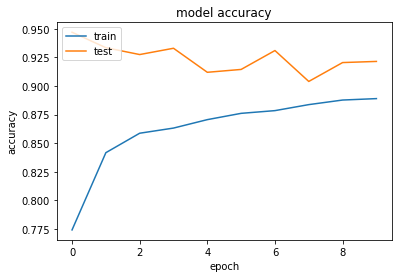

In [26]:
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


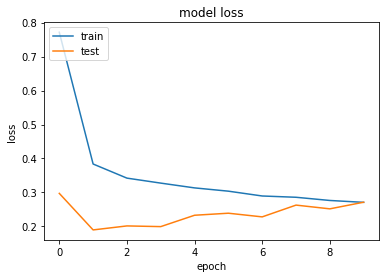

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


In [16]:
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=callbacks_list)
print(datetime.datetime.now())

Train on 8000 samples, validate on 2000 samples
Epoch 1/2
 304/8000 [>.............................] - ETA: 11:51 - loss: 0.6482 - acc: 0.7270

KeyboardInterrupt: 

### Use Pretrained embeddings


### Make use of chunksize

### Use Bert

### PreTrained Word2Vec Embeddings

In [194]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [205]:
word_vectors.wv.most_similar('worst')

/home/xavient/sarthak/abuseEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('Worst', 0.6146092414855957),
 ('weakest', 0.6143776774406433),
 ('scariest', 0.5957258343696594),
 ('ugliest', 0.5931180715560913),
 ('best', 0.5835110545158386),
 ('bleakest', 0.5718506574630737),
 ('strongest', 0.567145586013794),
 ('nastiest', 0.5644308924674988),
 ('lousiest', 0.5631451606750488),
 ('toughest', 0.5624395608901978)]

In [207]:
word_vectors.wv.word_vec('good').shape

/home/xavient/sarthak/abuseEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(300,)

In [ ]:
word_vectors.word_in

In [29]:
engStopwordsFiltered = ['this', 'am', 'is', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
                        'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about','between', 
                        'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 
                        'down', 'in', 'out', 'on', 'off', 'over', 'under','further', 'then', 'once', 'here', 
                        'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
                        'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 
                        't', 'are', 'do'
                       ]

In [32]:
dataSubset.head()

,Insult,Comment,FilteredComment,FilteredCommentStop
0,1,"""You fuck your dad.""","""You fuck your dad.""",You fuck your dad.
1,0,"""i really don't understand your point.\xa0 It ...","""i really do not understand your point. It see...",i really not understand your point. It seems t...
2,0,"""A\\xc2\\xa0majority of Canadians can and has ...","""A majority of Canadians can and has been wro...",majority Canadians can has been wrong now wil...
3,0,"""listen if you dont wanna get married to a man...","""listen if you dont wanna get married to a man...",listen you dont wanna get married man women DO...
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...","""C xec b uean xu uedng u ub ueddng bi uecu t x...",C xec b uean xu uedng u ub ueddng bi uecu xecn...


In [31]:
dataSubset['FilteredCommentStop'] = dataSubset.FilteredComment.apply(lambda x: " ".join([i for i in x.replace("\"","").split(" ") 
                                                if i.lower() not in engStopwordsFiltered]))

/home/xavient/sarthak/abuseEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [240]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(dataSubset.FilteredCommentStop))
list_tokenized_train = tokenizer.texts_to_sequences(dataSubset.FilteredComment)
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = dataSubset.Insult

word_index = tokenizer.word_index

In [248]:
EMBEDDING_DIM = 300
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if(i > num_words):
        continue
    try:
        embedding_vector = word_vectors.wv.word_vec(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    except Exception as e:
        pass

/home/xavient/sarthak/abuseEnv/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, RNN
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

model = Sequential()
embedding_layer = Embedding(num_words, EMBEDDING_DIM, embeddings_initializer=Constant(embedding_matrix), input_length=max_len,
                           trainable = False)
model.add(embedding_layer)
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [251]:
from keras.initializers import Constant

inp = Input(shape=(maxlen,))
embed_size = 128
x = Embedding(num_words, EMBEDDING_DIM, embeddings_initializer=Constant(embedding_matrix), trainable = False)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

batch_size = 64
epochs = 2

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1 )#, save_best_only=True, mode=)
callbacks_list = [checkpoint]

model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=callbacks_list)

print(datetime.datetime.now())

Train on 8000 samples, validate on 2000 samples
Epoch 1/2
8000/8000 [==============================] - 39s 5ms/step - loss: 0.4559 - acc: 0.7993 - val_loss: 0.2007 - val_acc: 0.9220

Epoch 00001: saving model to weights-improvement-01-0.92.hdf5
Epoch 2/2
8000/8000 [==============================] - 37s 5ms/step - loss: 0.3484 - acc: 0.8524 - val_loss: 0.1895 - val_acc: 0.9230

Epoch 00002: saving model to weights-improvement-02-0.92.hdf5
2019-12-23 13:45:46.995451


In [246]:
val_instance = tokenizer.texts_to_sequences(["This makes him an idiot.", "idiots are not.",
                                            "You are an idiot.", "How are you?", "You are idiom."])
X_val = pad_sequences(val_instance, maxlen=maxlen)

In [1]:
model.predict(X_val, batch_size = 1024)

NameError: name 'model' is not defined

In [ ]:
Bert Removing stop words
"This makes him an idiot.", "idiots are not.",
                                            "You are an idiot.", "How are you?", "He is idiot.", 
                    "You fuck your dad", "Fuck Off",
                    "No one fucking cares.", "Go fuck yourself", "He is an asshole", "You are a fucking bastards"
array([[0.06122674, 0.93877326],
       [0.67796753, 0.32203247],
       [0.00203341, 0.99796659],
       [0.88281558, 0.11718442],
       [0.01739723, 0.98260277],
       [0.35907524, 0.64092476],
       [0.45789212, 0.54210788],
       [0.97321074, 0.02678926],
       [0.07250323, 0.92749677],
       [0.13691632, 0.86308368],
       [0.02168334, 0.97831666]])


Bert
array([[0.06850969, 0.93149031],
       [0.99431943, 0.00568057],
       [0.11814867, 0.88185133],
       [0.94780603, 0.05219397],
       [0.7160597 , 0.2839403 ]])

Pretrained Word2Vec Batchsize-32
aarray([[0.48012155],
       [0.39337465],
       [0.86655927],
       [0.12711996],
       [0.38863614]], dtype=float32)

Pretrained Word2Vec Batchsize-16
array([[0.65484923],
       [0.56224924],
       [0.8965074 ],
       [0.19650725],
       [0.40224102]], dtype=float32)

Trainable word embeddings
array([[0.61772853],
       [0.21389118],
       [0.8951003 ],
       [0.3241301 ],
       [0.39017835]], dtype=float32

In [195]:
word_vectors['boy'].shape


(300,)

In [196]:
dataSubset['filteredCommentsEmbed'] = dataSubset.FilteredComment.apply(lambda x: np.mean([word_vectors[word] 
                                                                            for word in x.split() if word in word_vectors ], 
                                                                                  axis = 0))

/home/xavient/sarthak/abuseEnv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/xavient/sarthak/abuseEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
dataSubset.shape

(10000, 4)

In [201]:
extract_Embed = np.ones((dataSubset.shape[0], 300))

In [202]:
finalOutput = []

for i in range(dataSubset.shape[0]):
    finalOutput.append(dataSubset['filteredCommentsEmbed'][i] * extract_Embed[i,:])

In [203]:
dataSubset.columns

Index(['Insult', 'Comment', 'FilteredComment', 'filteredCommentsEmbed'], dtype='object')

In [ ]:
cols = ["col"+str(i) for i in range(300)]

finalOutput = pd.DataFrame(data=finalOutput, columns= cols)
finalOutput['label'] = dataSubset['label']

In [ ]:
dataToTrain = finalOutput.iloc[:train.shape[0] - 4,:]
dataToTest = finalOutput.iloc[train.shape[0] - 4:,:]

X_train, X_test, Y_train, Y_test = train_test_split(dataToTrain.drop(['label'], axis = 1),
                                                    dataToTrain['label'], test_size = 0.2)



### Using Bert-serving

In [ ]:
EMBEDDING_DIM = 300
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if(i > num_words):
        continue
    try:
        embedding_vector = word_vectors.wv.word_vec(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    except Exception as e:
        pass

In [ ]:
from bert_serving.client import BertClient
bc = BertClient()
bc.encode(['First do it', 'then do it right', 'then do it better'])

### Using Bert

In [33]:
len(dataSubset.FilteredCommentStop)

10000

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(dataSubset['FilteredCommentStop'], dataSubset['Insult'], test_size = 0.2)

In [36]:
train_df_bert = pd.DataFrame({
    'id':range(len(X_train)),
    'label':Y_train,
    'alpha':['a']*X_train.shape[0],
    'text': X_train
})

train_df_bert.head()

,id,label,alpha,text
3615,0,0,a,You fail miserably thwarting logic. Ever hear ...
1569,1,0,a,GODDAMMIT GUYS YOUR TV'S MUCH GAME MY FEEDS DA...
5231,2,0,a,Will falling gas prices help Obama?-----------...
7790,3,0,a,: Aww. ( It must have been its caught someth...
758,4,0,a,you think people site give shit prison guards'...


In [37]:
dev_df_bert = pd.DataFrame({
    'id':range(len(X_test)),
    'label':Y_test,
    'alpha':['a']*X_test.shape[0],
    'text': X_test
})

dev_df_bert.head()

,id,label,alpha,text
2368,0,1,a,Smacked who? You coonass boys sure corny.
7725,1,0,a,easy steps producing least B article
3433,2,0,a,They would be cuter salt & pepper sprinkled ho...
1262,3,0,a,<div class=forum-item forum-topic><div class=f...
8505,4,0,a,== Qamdo (county) == Hi. I was wondering you ...


In [38]:
train_df_bert.to_csv('Berttrain.tsv', sep='\t', index=False, header=False)
dev_df_bert.to_csv('Bertdev.tsv', sep='\t', index=False, header=False)

In [39]:
from __future__ import absolute_import, division, print_function

import csv
import logging
import os
import sys
from io import open

from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import matthews_corrcoef, f1_score

from multiprocessing import Pool, cpu_count
from tqdm import tqdm

logger = logging.getLogger(__name__)
csv.field_size_limit(2147483647)

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
        Args:
            guid: Unique id for the example.
            text_a: string. The untokenized text of the first sequence. For single
            sequence tasks, only this sequence must be specified.
            text_b: (Optional) string. The untokenized text of the second sequence.
            Only must be specified for sequence pair tasks.
            label: (Optional) string. The label of the example. This should be
            specified for train and dev examples, but not for test examples.
        """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label


class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, input_mask, segment_ids, label_id):
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_id = label_id


class DataProcessor(object):
    """Base class for data converters for sequence classification data sets."""

    def get_train_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the train set."""
        raise NotImplementedError()

    def get_dev_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the dev set."""
        raise NotImplementedError()

    def get_labels(self):
        """Gets the list of labels for this data set."""
        raise NotImplementedError()

    @classmethod
    def _read_tsv(cls, input_file, quotechar=None):
        """Reads a tab separated value file."""
        with open(input_file, "r", encoding="utf-8-sig") as f:
            reader = csv.reader(f, delimiter="\t", quotechar=quotechar)
            lines = []
            for line in reader:
                if sys.version_info[0] == 2:
                    line = list(unicode(cell, 'utf-8') for cell in line)
                lines.append(line)
            return lines


class BinaryProcessor(DataProcessor):
    """Processor for the binary data sets"""

    def get_train_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "train.tsv")), "train")

    def get_dev_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "dev.tsv")), "dev")

    def get_labels(self):
        """See base class."""
        return ["0", "1"]

    def _create_examples(self, lines, set_type):
        """Creates examples for the training and dev sets."""
        examples = []
        for (i, line) in enumerate(lines):
            guid = "%s-%s" % (set_type, i)
            text_a = line[3]
            label = line[1]
            examples.append(
                InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
        return examples


def convert_example_to_feature(example_row, pad_token=0,
sequence_a_segment_id=0, sequence_b_segment_id=1,
cls_token_segment_id=1, pad_token_segment_id=0,
mask_padding_with_zero=True):
    example, label_map, max_seq_length, tokenizer, output_mode, cls_token_at_end, cls_token, sep_token, cls_token_segment_id, pad_on_left, pad_token_segment_id = example_row

    tokens_a = tokenizer.tokenize(example.text_a)

    tokens_b = None
    if example.text_b:
        tokens_b = tokenizer.tokenize(example.text_b)
        # Modifies `tokens_a` and `tokens_b` in place so that the total
        # length is less than the specified length.
        # Account for [CLS], [SEP], [SEP] with "- 3"
        _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
    else:
        # Account for [CLS] and [SEP] with "- 2"
        if len(tokens_a) > max_seq_length - 2:
            tokens_a = tokens_a[:(max_seq_length - 2)]

    # The convention in BERT is:
    # (a) For sequence pairs:
    #  tokens:   [CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]
    #  type_ids:   0   0  0    0    0     0       0   0   1  1  1  1   1   1
    # (b) For single sequences:
    #  tokens:   [CLS] the dog is hairy . [SEP]
    #  type_ids:   0   0   0   0  0     0   0
    #
    # Where "type_ids" are used to indicate whether this is the first
    # sequence or the second sequence. The embedding vectors for `type=0` and
    # `type=1` were learned during pre-training and are added to the wordpiece
    # embedding vector (and position vector). This is not *strictly* necessary
    # since the [SEP] token unambiguously separates the sequences, but it makes
    # it easier for the model to learn the concept of sequences.
    #
    # For classification tasks, the first vector (corresponding to [CLS]) is
    # used as as the "sentence vector". Note that this only makes sense because
    # the entire model is fine-tuned.
    tokens = tokens_a + [sep_token]
    segment_ids = [sequence_a_segment_id] * len(tokens)

    if tokens_b:
        tokens += tokens_b + [sep_token]
        segment_ids += [sequence_b_segment_id] * (len(tokens_b) + 1)

    if cls_token_at_end:
        tokens = tokens + [cls_token]
        segment_ids = segment_ids + [cls_token_segment_id]
    else:
        tokens = [cls_token] + tokens
        segment_ids = [cls_token_segment_id] + segment_ids

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1 if mask_padding_with_zero else 0] * len(input_ids)

    # Zero-pad up to the sequence length.
    padding_length = max_seq_length - len(input_ids)
    if pad_on_left:
        input_ids = ([pad_token] * padding_length) + input_ids
        input_mask = ([0 if mask_padding_with_zero else 1] * padding_length) + input_mask
        segment_ids = ([pad_token_segment_id] * padding_length) + segment_ids
    else:
        input_ids = input_ids + ([pad_token] * padding_length)
        input_mask = input_mask + ([0 if mask_padding_with_zero else 1] * padding_length)
        segment_ids = segment_ids + ([pad_token_segment_id] * padding_length)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    if output_mode == "classification":
        label_id = label_map[example.label]
    elif output_mode == "regression":
        label_id = float(example.label)
    else:
        raise KeyError(output_mode)

    return InputFeatures(input_ids=input_ids,
                        input_mask=input_mask,
                        segment_ids=segment_ids,
                        label_id=label_id)
    

def convert_examples_to_features(examples, label_list, max_seq_length,
                                 tokenizer, output_mode,
                                 cls_token_at_end=False, pad_on_left=False,
                                 cls_token='[CLS]', sep_token='[SEP]', pad_token=0,
                                 sequence_a_segment_id=0, sequence_b_segment_id=1,
                                 cls_token_segment_id=1, pad_token_segment_id=0,
                                 mask_padding_with_zero=True):
    """ Loads a data file into a list of `InputBatch`s
        `cls_token_at_end` define the location of the CLS token:
            - False (Default, BERT/XLM pattern): [CLS] + A + [SEP] + B + [SEP]
            - True (XLNet/GPT pattern): A + [SEP] + B + [SEP] + [CLS]
        `cls_token_segment_id` define the segment id associated to the CLS token (0 for BERT, 2 for XLNet)
    """

    label_map = {label : i for i, label in enumerate(label_list)}

    examples = [(example, label_map, max_seq_length, tokenizer, output_mode, cls_token_at_end, cls_token, sep_token, cls_token_segment_id, pad_on_left, pad_token_segment_id) for example in examples]

    process_count = cpu_count() - 2

    with Pool(process_count) as p:
        features = list(tqdm(p.imap(convert_example_to_feature, examples, chunksize=100), total=len(examples)))


    return features


def _truncate_seq_pair(tokens_a, tokens_b, max_length):
    """Truncates a sequence pair in place to the maximum length."""

    # This is a simple heuristic which will always truncate the longer sequence
    # one token at a time. This makes more sense than truncating an equal percent
    # of tokens from each, since if one sequence is very short then each token
    # that's truncated likely contains more information than a longer sequence.
    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_length:
            break
        if len(tokens_a) > len(tokens_b):
            tokens_a.pop()
        else:
            tokens_b.pop()


processors = {
    "binary": BinaryProcessor
}

output_modes = {
    "binary": "classification"
}

GLUE_TASKS_NUM_LABELS = {
    "binary": 2
}

In [40]:
from __future__ import absolute_import, division, print_function

import glob
import logging
import os
import random
import json

import numpy as np
import torch
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler,
                              TensorDataset)
import random
from torch.utils.data.distributed import DistributedSampler
from tqdm import tqdm_notebook, trange

from pytorch_transformers import (WEIGHTS_NAME, BertConfig, BertForSequenceClassification, BertTokenizer,
                                  XLMConfig, XLMForSequenceClassification, XLMTokenizer, 
                                  XLNetConfig, XLNetForSequenceClassification, XLNetTokenizer,
                                  RobertaConfig, RobertaForSequenceClassification, RobertaTokenizer)

from pytorch_transformers import AdamW, WarmupLinearSchedule

# from utils import (convert_examples_to_features,
#                         output_modes, processors)

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [41]:
args = {
    'data_dir': './',
    'model_type':  'bert',
    'model_name': 'bert-base-cased',
    'task_name': 'binary',
    'output_dir': 'outputs/',
    'cache_dir': 'cache/',
    'do_train': True,
    'do_eval': True,
    'fp16': True,
    'fp16_opt_level': 'O1',
    'max_seq_length': 128,
    'output_mode': 'classification',
    'train_batch_size': 8,
    'eval_batch_size': 8,

    'gradient_accumulation_steps': 1,
    'num_train_epochs': 1,
    'weight_decay': 0,
    'learning_rate': 4e-5,
    'adam_epsilon': 1e-8,
    'warmup_steps': 0,
    'max_grad_norm': 1.0,

    'logging_steps': 50,
    'evaluate_during_training': False,
    'save_steps': 2000,
    'eval_all_checkpoints': True,

    'overwrite_output_dir': False,
    'reprocess_input_data': True,
    'notes': 'Using Yelp Reviews dataset'
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [42]:
with open('args.json', 'w') as f:
    json.dump(args, f)

In [43]:
if os.path.exists(args['output_dir']) and os.listdir(args['output_dir']) and args['do_train'] and not args['overwrite_output_dir']:
    raise ValueError("Output directory ({}) already exists and is not empty. Use --overwrite_output_dir to overcome.".format(args['output_dir']))

In [44]:
MODEL_CLASSES = {
    'bert': (BertConfig, BertForSequenceClassification, BertTokenizer),
#     'xlnet': (XLNetConfig, XLNetForSequenceClassification, XLNetTokenizer),
#     'xlm': (XLMConfig, XLMForSequenceClassification, XLMTokenizer),
#     'roberta': (RobertaConfig, RobertaForSequenceClassification, RobertaTokenizer)
}

config_class, model_class, tokenizer_class = MODEL_CLASSES[args['model_type']]

In [ ]:
config = config_class.from_pretrained(args['model_name'], num_labels=2, finetuning_task=args['task_name'])
tokenizer = tokenizer_class.from_pretrained(args['model_name'])

In [ ]:
model = model_class.from_pretrained(args['model_name'])

In [ ]:
model.to(device);

In [ ]:
task = args['task_name']

processor = processors[task]()
label_list = processor.get_labels()
num_labels = len(label_list)

In [ ]:
def load_and_cache_examples(task, tokenizer, evaluate=False):
    processor = processors[task]()
    output_mode = args['output_mode']
    
    mode = 'dev' if evaluate else 'train'
    cached_features_file = os.path.join(args['data_dir'], f"cached_{mode}_{args['model_name']}_{args['max_seq_length']}_{task}")
    
    if os.path.exists(cached_features_file) and not args['reprocess_input_data']:
        logger.info("Loading features from cached file %s", cached_features_file)
        features = torch.load(cached_features_file)
               
    else:
        logger.info("Creating features from dataset file at %s", args['data_dir'])
        label_list = processor.get_labels()
        examples = processor.get_dev_examples(args['data_dir']) if evaluate else processor.get_train_examples(args['data_dir'])
        
        features = convert_examples_to_features(examples, label_list, args['max_seq_length'], tokenizer, output_mode,
            cls_token_at_end=bool(args['model_type'] in ['xlnet']),            # xlnet has a cls token at the end
            cls_token=tokenizer.cls_token,
            sep_token=tokenizer.sep_token,
            cls_token_segment_id=2 if args['model_type'] in ['xlnet'] else 0,
            pad_on_left=bool(args['model_type'] in ['xlnet']),                 # pad on the left for xlnet
            pad_token_segment_id=4 if args['model_type'] in ['xlnet'] else 0)
        
        logger.info("Saving features into cached file %s", cached_features_file)
        torch.save(features, cached_features_file)
        
    all_input_ids = torch.tensor([f.input_ids for f in features], dtype=torch.long)
    all_input_mask = torch.tensor([f.input_mask for f in features], dtype=torch.long)
    all_segment_ids = torch.tensor([f.segment_ids for f in features], dtype=torch.long)
    if output_mode == "classification":
        all_label_ids = torch.tensor([f.label_id for f in features], dtype=torch.long)
    elif output_mode == "regression":
        all_label_ids = torch.tensor([f.label_id for f in features], dtype=torch.float)

    dataset = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)
    return dataset

In [ ]:
def train(train_dataset, model, tokenizer):
    tb_writer = SummaryWriter()
    
    train_sampler = RandomSampler(train_dataset)
    train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=args['train_batch_size'])
    
    t_total = len(train_dataloader) // args['gradient_accumulation_steps'] * args['num_train_epochs']
    
    no_decay = ['bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': args['weight_decay']},
        {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=args['learning_rate'], eps=args['adam_epsilon'])
    scheduler = WarmupLinearSchedule(optimizer, warmup_steps=args['warmup_steps'], t_total=t_total)
    
    if args['fp16']:
        try:
            from apex import amp
        except ImportError:
            raise ImportError("Please install apex from https://www.github.com/nvidia/apex to use fp16 training.")
        model, optimizer = amp.initialize(model, optimizer, opt_level=args['fp16_opt_level'])
        
    logger.info("***** Running training *****")
    logger.info("  Num examples = %d", len(train_dataset))
    logger.info("  Num Epochs = %d", args['num_train_epochs'])
    logger.info("  Total train batch size  = %d", args['train_batch_size'])
    logger.info("  Gradient Accumulation steps = %d", args['gradient_accumulation_steps'])
    logger.info("  Total optimization steps = %d", t_total)

    global_step = 0
    tr_loss, logging_loss = 0.0, 0.0
    model.zero_grad()
    train_iterator = trange(int(args['num_train_epochs']), desc="Epoch")
    
    for _ in train_iterator:
        epoch_iterator = tqdm_notebook(train_dataloader, desc="Iteration")
        for step, batch in enumerate(epoch_iterator):
            model.train()
            batch = tuple(t.to(device) for t in batch)
            inputs = {'input_ids':      batch[0],
                      'attention_mask': batch[1],
                      'token_type_ids': batch[2] if args['model_type'] in ['bert', 'xlnet'] else None,  # XLM don't use segment_ids
                      'labels':         batch[3]}
            outputs = model(**inputs)
            loss = outputs[0]  # model outputs are always tuple in pytorch-transformers (see doc)
            print("\r%f" % loss, end='')

            if args['gradient_accumulation_steps'] > 1:
                loss = loss / args['gradient_accumulation_steps']

            if args['fp16']:
                with amp.scale_loss(loss, optimizer) as scaled_loss:
                    scaled_loss.backward()
                torch.nn.utils.clip_grad_norm_(amp.master_params(optimizer), args['max_grad_norm'])
                
            else:
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), args['max_grad_norm'])

            tr_loss += loss.item()
            if (step + 1) % args['gradient_accumulation_steps'] == 0:
                scheduler.step()  # Update learning rate schedule
                optimizer.step()
                model.zero_grad()
                global_step += 1

                if args['logging_steps'] > 0 and global_step % args['logging_steps'] == 0:
                    # Log metrics
                    if args['evaluate_during_training']:  # Only evaluate when single GPU otherwise metrics may not average well
                        results = evaluate(model, tokenizer)
                        for key, value in results.items():
                            tb_writer.add_scalar('eval_{}'.format(key), value, global_step)
                    tb_writer.add_scalar('lr', scheduler.get_lr()[0], global_step)
                    tb_writer.add_scalar('loss', (tr_loss - logging_loss)/args['logging_steps'], global_step)
                    logging_loss = tr_loss

                if args['save_steps'] > 0 and global_step % args['save_steps'] == 0:
                    # Save model checkpoint
                    output_dir = os.path.join(args['output_dir'], 'checkpoint-{}'.format(global_step))
                    if not os.path.exists(output_dir):
                        os.makedirs(output_dir)
                    model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
                    model_to_save.save_pretrained(output_dir)
                    logger.info("Saving model checkpoint to %s", output_dir)


    return global_step, tr_loss / global_step

In [ ]:
from sklearn.metrics import mean_squared_error, matthews_corrcoef, confusion_matrix
from scipy.stats import pearsonr

def get_mismatched(labels, preds):
    mismatched = labels != preds
    examples = processor.get_dev_examples(args['data_dir'])
    wrong = [i for (i, v) in zip(examples, mismatched) if v]
    
    return wrong

def get_eval_report(labels, preds):
    mcc = matthews_corrcoef(labels, preds)
    tn, fp, fn, tp = confusion_matrix(labels, preds).ravel()
    return {
        "mcc": mcc,
        "tp": tp,
        "tn": tn,
        "fp": fp,
        "fn": fn
    }, get_mismatched(labels, preds)

def compute_metrics(task_name, preds, labels):
    assert len(preds) == len(labels)
    return get_eval_report(labels, preds)

def evaluate(model, tokenizer, prefix=""):
    # Loop to handle MNLI double evaluation (matched, mis-matched)
    eval_output_dir = args['output_dir']

    results = {}
    EVAL_TASK = args['task_name']

    eval_dataset = load_and_cache_examples(EVAL_TASK, tokenizer, evaluate=True)
    if not os.path.exists(eval_output_dir):
        os.makedirs(eval_output_dir)


    eval_sampler = SequentialSampler(eval_dataset)
    eval_dataloader = DataLoader(eval_dataset, sampler=eval_sampler, batch_size=args['eval_batch_size'])

    # Eval!
    logger.info("***** Running evaluation {} *****".format(prefix))
    logger.info("  Num examples = %d", len(eval_dataset))
    logger.info("  Batch size = %d", args['eval_batch_size'])
    eval_loss = 0.0
    nb_eval_steps = 0
    preds = None
    out_label_ids = None
    for batch in tqdm_notebook(eval_dataloader, desc="Evaluating"):
        model.eval()
        batch = tuple(t.to(device) for t in batch)

        with torch.no_grad():
            inputs = {'input_ids':      batch[0],
                      'attention_mask': batch[1],
                      'token_type_ids': batch[2] if args['model_type'] in ['bert', 'xlnet'] else None,  # XLM don't use segment_ids
                      'labels':         batch[3]}
            outputs = model(**inputs)
            tmp_eval_loss, logits = outputs[:2]

            eval_loss += tmp_eval_loss.mean().item()
        nb_eval_steps += 1
        if preds is None:
            preds = logits.detach().cpu().numpy()
            out_label_ids = inputs['labels'].detach().cpu().numpy()
        else:
            preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)
            out_label_ids = np.append(out_label_ids, inputs['labels'].detach().cpu().numpy(), axis=0)

    eval_loss = eval_loss / nb_eval_steps
    if args['output_mode'] == "classification":
        preds = np.argmax(preds, axis=1)
    elif args['output_mode'] == "regression":
        preds = np.squeeze(preds)
    result, wrong = compute_metrics(EVAL_TASK, preds, out_label_ids)
    results.update(result)

    output_eval_file = os.path.join(eval_output_dir, "eval_results.txt")
    with open(output_eval_file, "w") as writer:
        logger.info("***** Eval results {} *****".format(prefix))
        for key in sorted(result.keys()):
            logger.info("  %s = %s", key, str(result[key]))
            writer.write("%s = %s\n" % (key, str(result[key])))

    return results, wrong

In [ ]:
if args['do_train']:
    train_dataset = load_and_cache_examples(task, tokenizer)
    global_step, tr_loss = train(train_dataset, model, tokenizer)
    logger.info(" global_step = %s, average loss = %s", global_step, tr_loss)